In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data_T = pd.read_csv('d.csv')

In [3]:
data = data_T.T[1:]

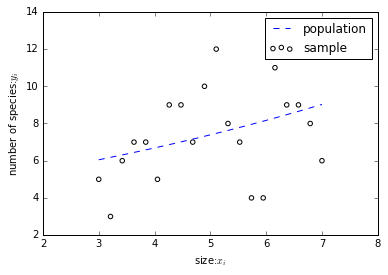

In [4]:
plt.scatter(data[0],data[1],facecolor='none',label='sample')
plt.plot(np.linspace(3,7,10),np.exp(1.5+0.1*np.linspace(3,7,10)),'--',label='population')
plt.legend(loc='upper right')
plt.xlabel('size:$x_{i}$')
plt.ylabel('number of species:$y_{i}$')

In [5]:
data.x_c = sm.add_constant(data[0])
result = sm.GLM(data[1],data.x_c,family=sm.families.Poisson()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      1   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -45.018
Date:                Fri, 29 Jul 2016   Deviance:                       14.171
Time:                        18:00:44   Pearson chi2:                     13.6
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.5661      0.360      4.351      0.000         0.861     2.272
0              0.0833      0.068      1.219      0.223        -0.051     0.217
==============================================================================
"""

無情報事前分布
- 一様分布
- 平べったい正規分布

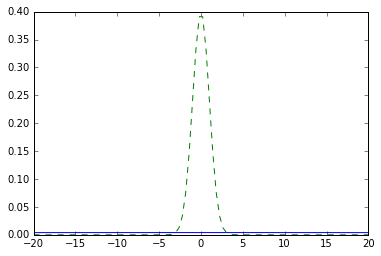

In [6]:
x = np.linspace(-20,20,100)
plt.plot(x,stats.norm.pdf(x,0,100))
plt.plot(x,stats.norm.pdf(x,0,1),'--')
plt.show()

In [15]:
import pymc3
basic_model = pymc3.Model()
with basic_model:
    beta0 = pymc3.Normal('beta0',mu=0,sd=10)
    beta1 = pymc3.Normal('beta1',mu=0,sd=10)
    
    mu = pymc3.exp(beta0 + beta1*data[0])
    Y_obs = pymc3.Poisson('Y_obs',mu=mu,observed=data[1])
    
    start = pymc3.mcmc(input=[mu,data[0]])

AttributeError: 'module' object has no attribute 'mcmc'